<a href="https://colab.research.google.com/github/patteeraL/research-trends-analysis-tohoku-earthquake/blob/main/notebooks/trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install pandas openpyxl networkx matplotlib python-louvain dash dash-cytoscape pandas networkx community nltk

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import community as community_louvain
import community.community_louvain as community_louvain

In [16]:
# Load the spreadsheet
file_path = "scopus.csv"
keyword_column = "Index Keywords"

In [32]:
# Ensure necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [33]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
# Read the CSV file
data = pd.read_csv(file_path)

In [35]:
data

,Authors,Title,DOI,Link,Abstract,Author Keywords,Index Keywords
0,"Vescovo R., Adriano B., Mas E., Koshimura S.",Beyond tsunami fragility functions: experiment...,10.1038/s41598-023-41047-y,https://www.scopus.com/inward/record.uri?eid=2...,Tsunami fragility functions (TFF) are statisti...,NaN,article; earthquake; Japan; machine learning; ...
1,"Di Bacco M., Rotello P., Suppasri A., Scorzini...",Leveraging data driven approaches for enhanced...,10.1016/j.envsoft.2022.105604,https://www.scopus.com/inward/record.uri?eid=2...,"This study aims at developing an empirical, mu...",Building damage; Feature importance; Japan; Ma...,Learning algorithms; Machine learning; Buildin...
2,"Li Y., Goda K.",Random forest-based multi-hazard loss estimati...,10.1080/19475705.2023.2275538,https://www.scopus.com/inward/record.uri?eid=2...,This article presents a novel approach to esti...,coastal communities; monitoring sensors; Multi...,Earthquakes; Hazards; Offshore oil well produc...
3,"Fukui N., Mori N., Miyashita T., Shimura T., G...",Subgrid-scale modeling of tsunami inundation i...,10.1016/j.coastaleng.2022.104175,https://www.scopus.com/inward/record.uri?eid=2...,Numerical tsunami inundation simulations using...,Building; Individual drag force model (iDFM); ...,Buildings; Drag; Floods; Mesh generation; Topo...
4,"Jain N., Virmani D., Abraham A.",Tsunami in the last 15 years: a bibliometric a...,10.1007/s11069-020-04454-2,https://www.scopus.com/inward/record.uri?eid=2...,"In the last fifteen years, tsunami science has...",Bibliometric; DART; Indian Ocean; Japan; NOAA;...,damage; future prospect; numerical model; pale...
5,"Saengtabtim K., Leelawat N., Tang J., Treeranu...",Predictive Analysis of the Building Damage fro...,10.1109/ACCESS.2021.3060114,https://www.scopus.com/inward/record.uri?eid=2...,"When considering a tsunami disaster, many rese...",2011 Great East Japan earthquake and tsunami; ...,Decision trees; Flow velocity; Predictive anal...
6,"Bai Y., Hu J., Su J., Liu X., Liu H., He X., M...",Pyramid pooling module-based semi-siamese netw...,10.3390/rs12244055,https://www.scopus.com/inward/record.uri?eid=2...,Most mainstream research on assessing building...,Benchmark model; Damage assessment; End-to-end...,Automation; Large dataset; Ablation experiment...
7,Goda K.,Multi-Hazard Portfolio Loss Estimation for Tim...,10.3389/feart.2020.592444,https://www.scopus.com/inward/record.uri?eid=2...,Megathrust subduction earthquakes generate int...,building portfolio; megathrust subduction eart...,Computation theory; Fault slips; Hazards; Pois...
8,"Suppasri A., Pakoksung K., Charvet I., Ting Ch...",Load-resistance analysis: An alternative appro...,10.5194/nhess-19-1807-2019,https://www.scopus.com/inward/record.uri?eid=2...,Tsunami fragility functions describe the proba...,NaN,building; collapse; hydrodynamic force; loadin...
9,"Endo Y., Adriano B., Mas E., Koshimura S.",New insights into multiclass damage classifica...,10.3390/rs10122059,https://www.scopus.com/inward/record.uri?eid=2...,The fine resolution of synthetic aperture rada...,Buildings; Change detection; Synthetic apertur...,Buildings; Classification (of information); Da...


In [36]:
# Function to normalize a phrase
def normalize_phrase(phrase):
    """
    Normalize a phrase by:
    1. Splitting it into words.
    2. Converting words to lowercase.
    3. Lemmatizing each word.
    4. Sorting the words to ensure consistent order.
    5. Joining the words back into a standardized phrase.
    """
    words = phrase.split()  # Split phrase into words
    normalized_words = sorted(
        [lemmatizer.lemmatize(word.lower()) for word in words]
    )  # Lowercase, lemmatize, and sort
    return " ".join(normalized_words)  # Join words into a phrase

In [37]:
# Extract keywords, convert to lowercase, lemmatize, and normalize
data[keyword_column] = data[keyword_column].fillna("")  # Fill NaN with empty strings
data['keywords'] = data[keyword_column].apply(
    lambda x: [
        normalize_phrase(k.strip())  # Normalize each keyword
        for k in x.split(";") if k.strip()
    ]
)

In [38]:
data['keywords']

,keywords
0,"[article, earthquake, japan, learning machine,..."
1,"[algorithm learning, learning machine, buildin..."
2,"[earthquake, hazard, offshore oil production w..."
3,"[building, drag, flood, generation mesh, topog..."
4,"[damage, future prospect, model numerical, pal..."
5,"[decision tree, flow velocity, analytics predi..."
6,"[automation, dataset large, ablation experimen..."
7,"[computation theory, fault slip, hazard, distr..."
8,"[building, collapse, force hydrodynamic, loadi..."
9,"[building, (of classification information), da..."


In [39]:
# Count keyword occurrences
all_keywords = [keyword for sublist in data['keywords'] for keyword in sublist]
keyword_counts = Counter(all_keywords)

In [92]:
all_keywords

['article',
 'earthquake',
 'japan',
 'learning machine',
 'parameter physical',
 'algorithm learning',
 'learning machine',
 'building damage',
 'damage modelling',
 'approach data-driven',
 'feature importance',
 'japan',
 'machine-learning',
 'multi variable',
 'on-machines',
 'spatial transferability',
 'damage tsunami',
 'tsunami',
 'algorithm',
 'damage',
 'environmental modeling',
 'implementation process',
 'learning machine',
 'tsunami',
 'honshu',
 'japan',
 'tohoku',
 'earthquake',
 'hazard',
 'offshore oil production well',
 'management risk',
 'tsunami',
 'coastal community',
 'estimation loss',
 'monitoring network',
 'monitoring sensor',
 'loss multi-hazard',
 'multi-hazards',
 'power',
 'forest modeling random',
 'forest random',
 'subduction zone',
 'error mean square',
 'building',
 'drag',
 'flood',
 'generation mesh',
 'topography',
 'drag force model',
 'fluid velocity',
 'high resolution',
 'drag force individual model',
 'experiment numerical',
 'model resolving 

In [72]:
keyword_counts.most_common()

[('tsunami', 15),
 ('earthquake', 10),
 ('japan', 9),
 ('building', 8),
 ('2011 earthquake tohoku', 8),
 ('building damage', 5),
 ('honshu', 5),
 ('tohoku', 5),
 ('hazard', 5),
 ('aperture radar synthetic', 5),
 ('earthquake east great japan', 4),
 ('damage detection', 4),
 ('learning machine', 3),
 ('algorithm', 3),
 ('event tsunami', 3),
 ('imagery satellite', 3),
 ('miyagi', 3),
 ('disaster', 3),
 ('pixel', 3),
 ('change detection', 3),
 ('imaging radar', 3),
 ('artificial intelligence', 3),
 ('learning system', 3),
 ('satellite', 3),
 ('terrasar-x', 3),
 ('algorithm learning', 2),
 ('damage tsunami', 2),
 ('damage', 2),
 ('coastal community', 2),
 ('hazard seismic', 2),
 ('decision tree', 2),
 ('(mathematics) tree', 2),
 ('model stochastic', 2),
 ('stochastic system', 2),
 ('analysis uncertainty', 2),
 ('earthquake recurrence', 2),
 ('ground motion', 2),
 ('ishinomaki', 2),
 ('classification image', 2),
 ('machine support vector', 2),
 ('mapping', 2),
 ('geophysics', 2),
 ('samplin

In [67]:
# Create an empty graph
G = nx.Graph()

In [68]:
# Add edges to the graph based on co-occurrence of keywords
for keyword_list in data['keywords']:
    for pair in combinations(keyword_list, 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(*pair, weight=1)

In [69]:
# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

In [70]:
# Assign community colors
community_colors = {node: f"C{color}" for node, color in partition.items()}


In [71]:
# Assign node sizes based on keyword frequency
node_sizes = [keyword_counts[node] * 100 for node in G.nodes]

In [64]:
pos = nx.spring_layout(G, seed=42)

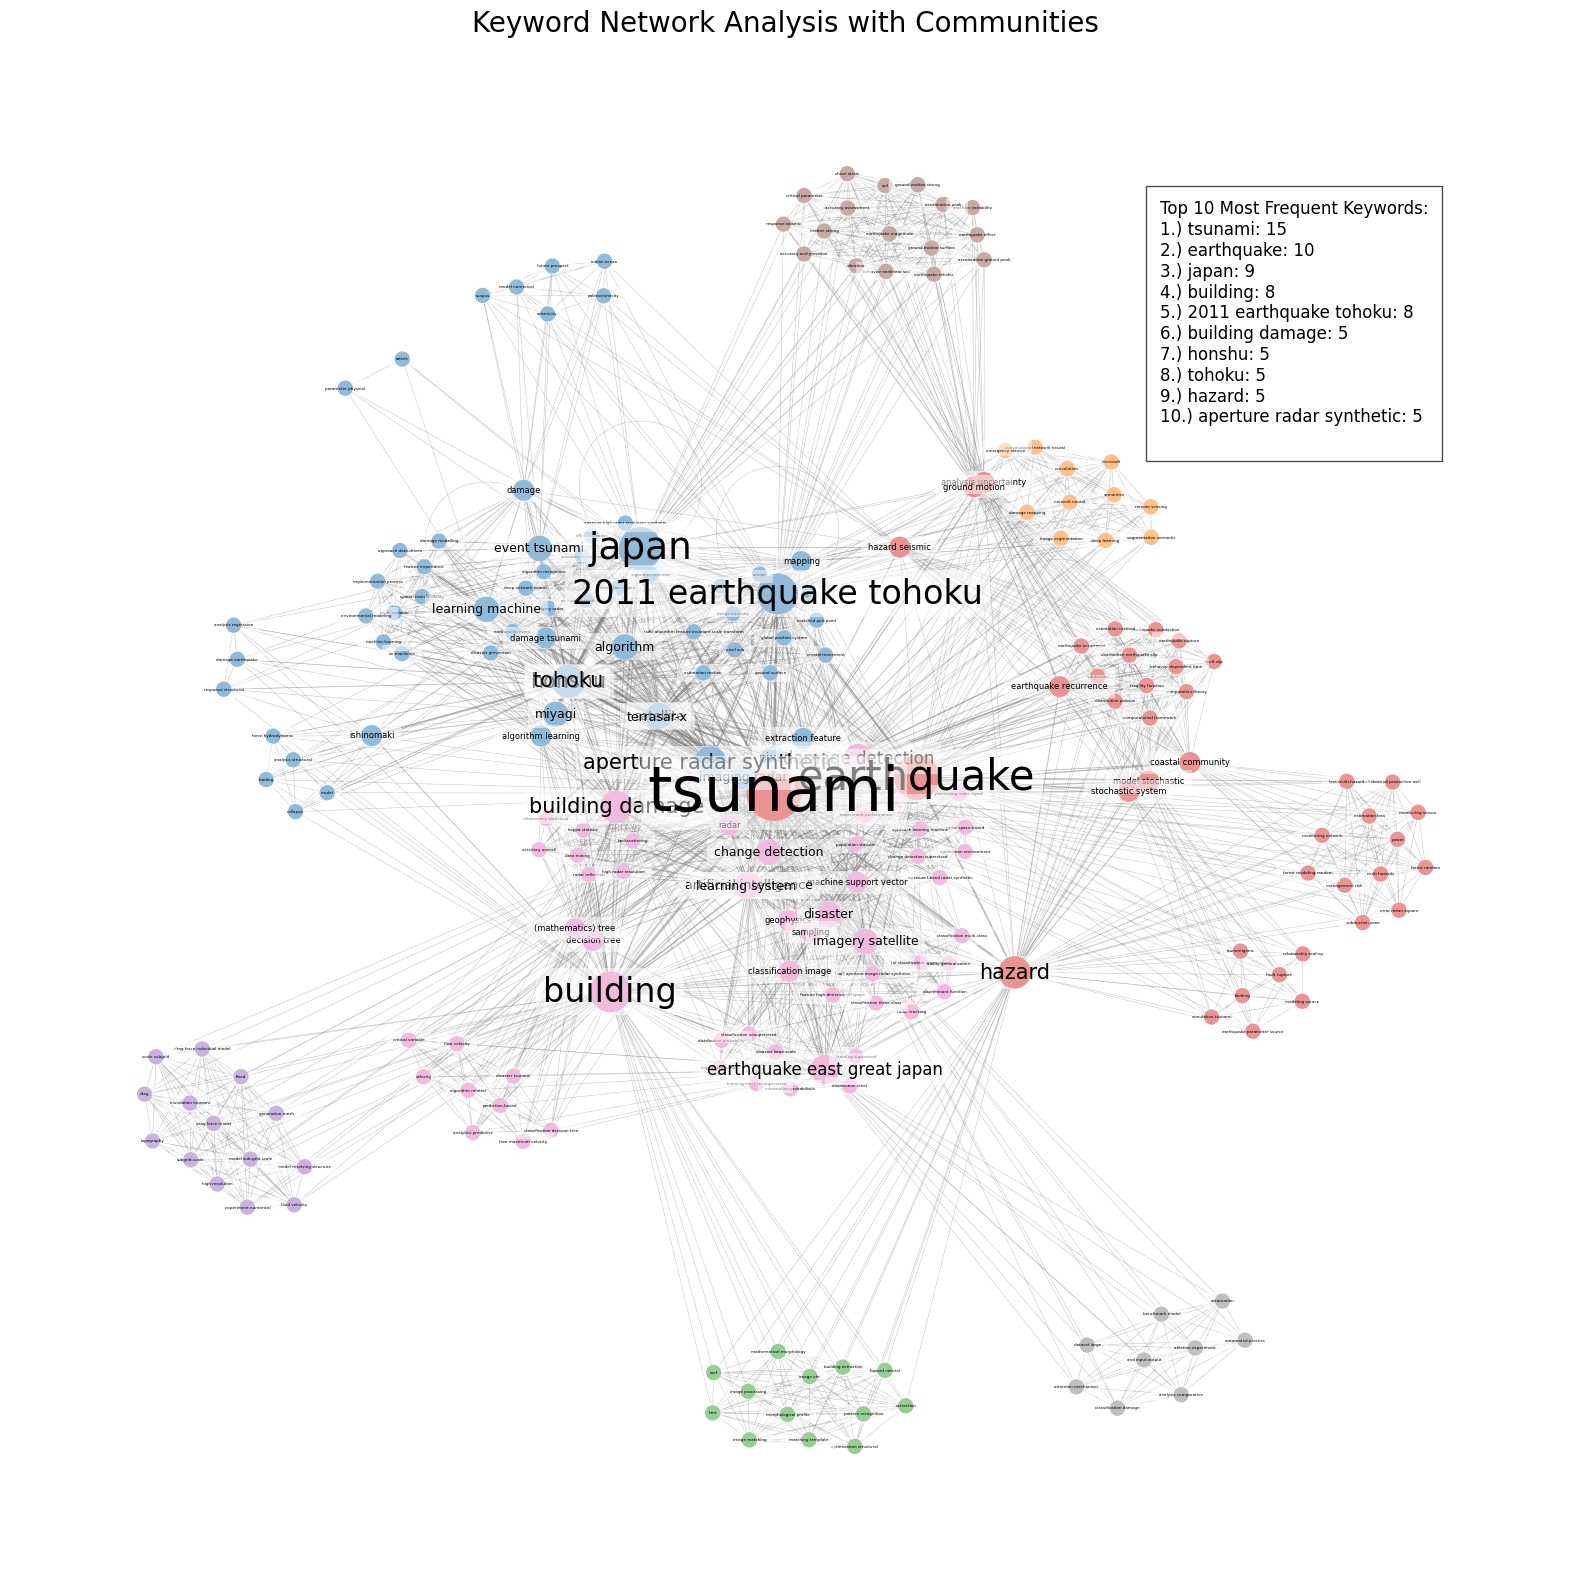

In [65]:
# Set the figure size
plt.figure(figsize=(20, 20))  # Adjust the figure size (width, height) as needed

# Draw nodes with colors based on community
nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, node_color=[community_colors[node] for node in G.nodes]
)

# Draw edges with weight-based transparency
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(
    G, pos, edgelist=edges.keys(), alpha=0.5, edge_color="grey", width=[w / 3 for w in edges.values()]
)

# Sort the nodes by keyword_counts in descending order to simulate z-index
sorted_nodes = sorted(pos.items(), key=lambda item: keyword_counts[item[0]], reverse=False)

for node, (x, y) in sorted_nodes:
    font_size = 3 * keyword_counts[node]
    plt.text(x, y, s=node, fontsize=font_size, ha='center', va='center', color='black',
             bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5, 'edgecolor': 'none'})


top_10_keywords = keyword_counts.most_common(10)
table_str = "Top 10 Most Frequent Keywords:\n"
i = 1
for keyword, count in top_10_keywords:
    table_str += f"{i}.) {keyword}: {count}\n"
    i+=1

plt.figtext(0.7, 0.8, table_str, fontsize=12, ha="left", va="top", bbox={"facecolor": "white", "alpha": 0.7, "pad": 10})

# Add title and remove axes
plt.title("Keyword Network Analysis with Communities", fontsize=20)  # Larger title
plt.axis("off")

# Display the plot
plt.show()


In [101]:
# Filter keywords with counts > 1
filtered_keywords = {keyword: count for keyword, count in keyword_counts.items() if count > 1}

In [102]:
filtered_keywords

{'earthquake': 10,
 'japan': 9,
 'learning machine': 3,
 'algorithm learning': 2,
 'building damage': 5,
 'damage tsunami': 2,
 'tsunami': 15,
 'algorithm': 3,
 'damage': 2,
 'honshu': 5,
 'tohoku': 5,
 'hazard': 5,
 'coastal community': 2,
 'building': 8,
 'hazard seismic': 2,
 '2011 earthquake tohoku': 8,
 'event tsunami': 3,
 'decision tree': 2,
 '(mathematics) tree': 2,
 'earthquake east great japan': 4,
 'imagery satellite': 3,
 'model stochastic': 2,
 'stochastic system': 2,
 'analysis uncertainty': 2,
 'earthquake recurrence': 2,
 'ground motion': 2,
 'ishinomaki': 2,
 'miyagi': 3,
 'damage detection': 4,
 'disaster': 3,
 'classification image': 2,
 'pixel': 3,
 'machine support vector': 2,
 'aperture radar synthetic': 5,
 'change detection': 3,
 'imaging radar': 3,
 'mapping': 2,
 'artificial intelligence': 3,
 'geophysics': 2,
 'learning system': 3,
 'sampling': 2,
 'satellite': 3,
 'terrasar-x': 3,
 'extraction feature': 2,
 'radar': 2}

In [115]:
# Create a new graph excluding low-frequency keywords
G_filtered = nx.Graph()

In [116]:
# self-loop means some cases like {machine learning, Manchine learning} in the same research
for keyword_list in data['keywords']:
    filtered_list = [kw for kw in keyword_list if kw in filtered_keywords]
    for pair in combinations(filtered_list, 2):
        if G_filtered.has_edge(*pair):
            G_filtered[pair[0]][pair[1]]['weight'] += 1
        else:
            G_filtered.add_edge(*pair, weight=1)

In [117]:
# Detect communities using Louvain method
partition_filtered = community_louvain.best_partition(G_filtered)

In [118]:
# Assign community colors
community_colors_filtered = {node: f"C{color}" for node, color in partition_filtered.items()}

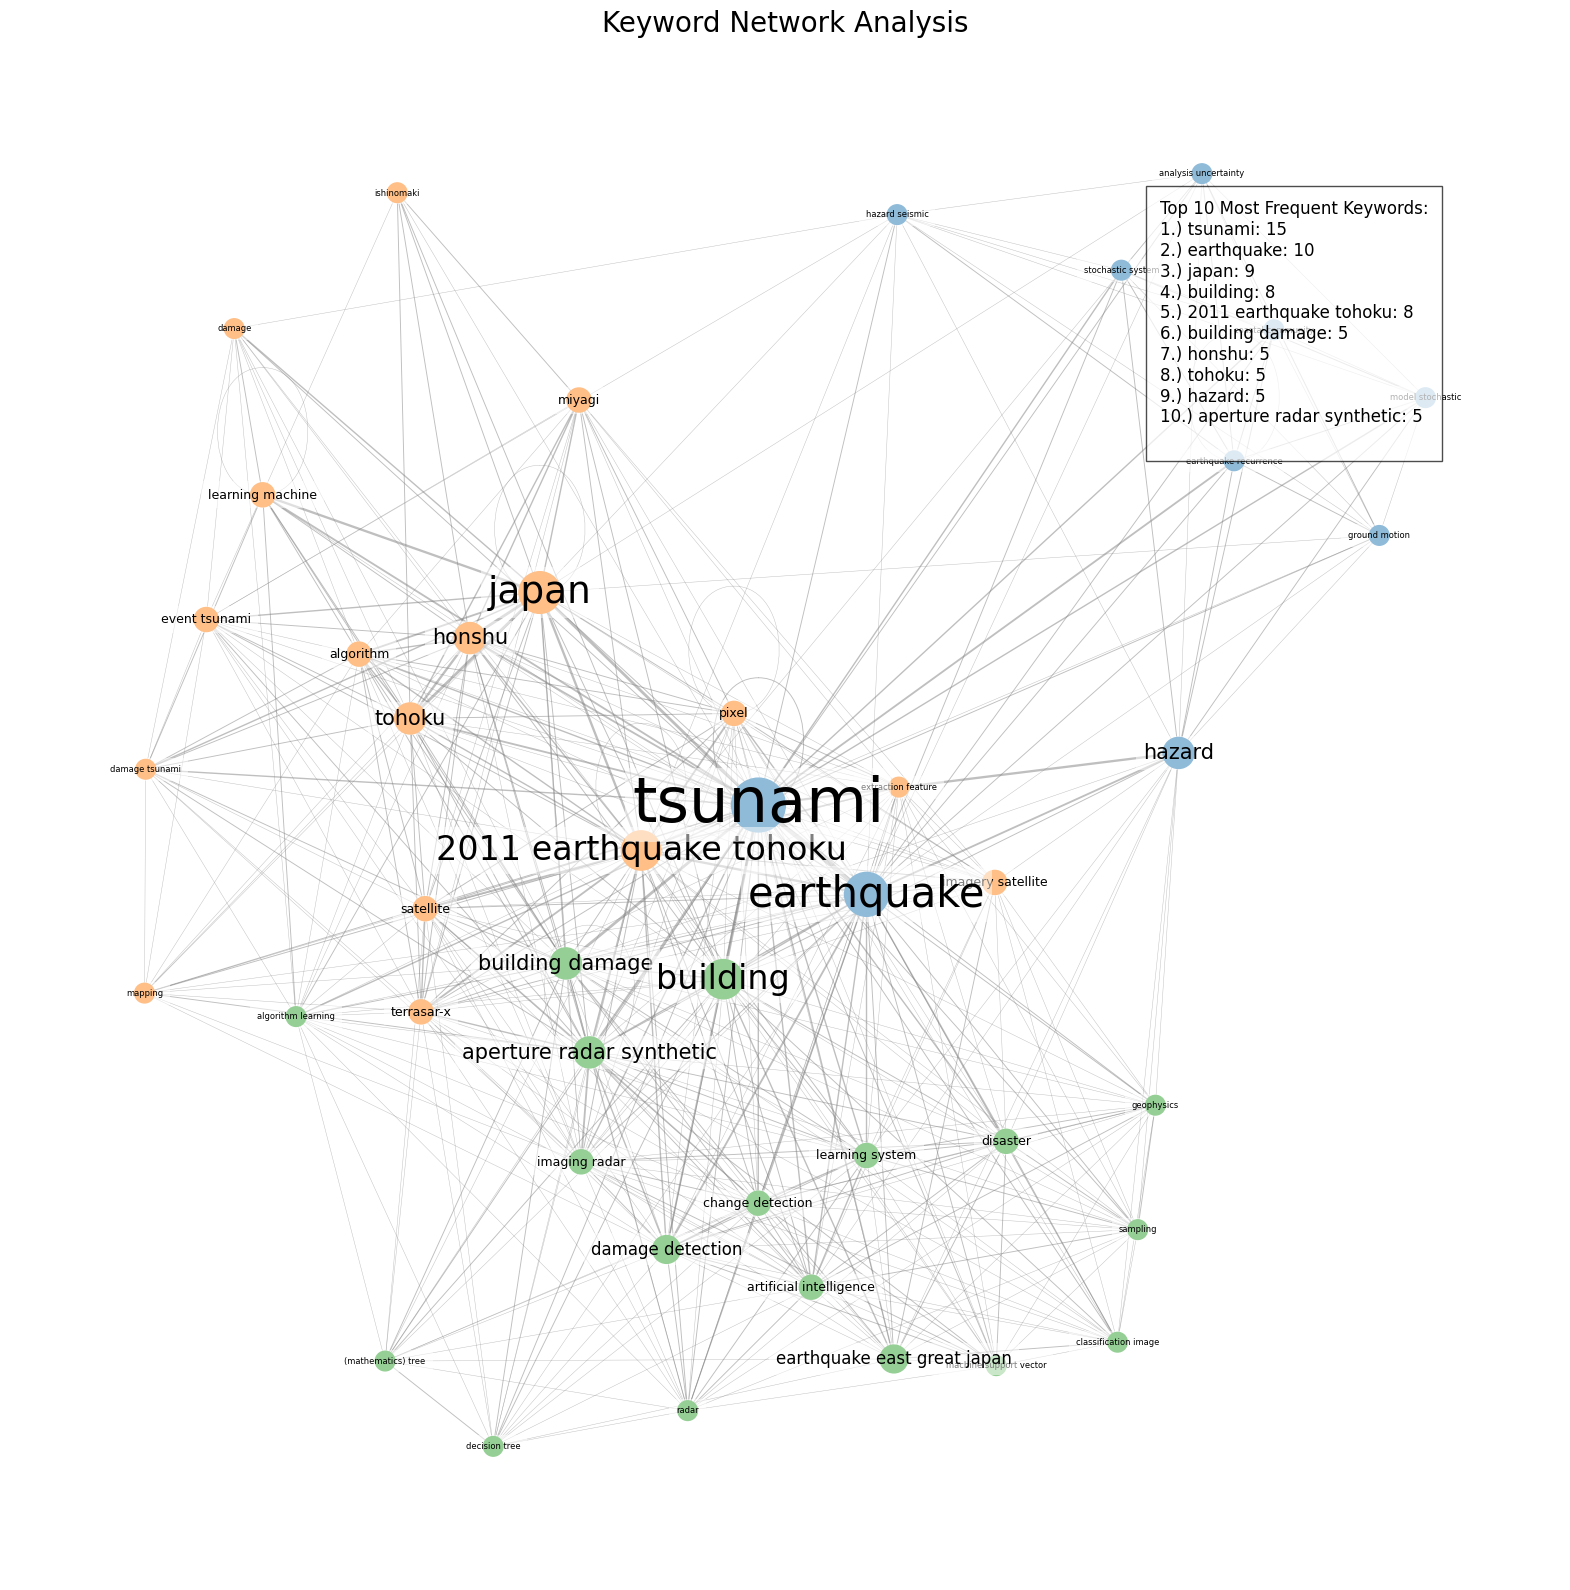

In [119]:
# Assign node sizes based on keyword frequency
node_sizes_filtered = [keyword_counts[node] * 100 for node in G_filtered.nodes]

# Generate layout for filtered graph
pos_filtered = nx.spring_layout(G_filtered, seed=42)

# Plot the filtered graph
plt.figure(figsize=(20, 20))

# Draw nodes with colors based on community
nx.draw_networkx_nodes(
    G_filtered, pos_filtered, node_size=node_sizes_filtered,
    node_color=[community_colors_filtered[node] for node in G_filtered.nodes]
)

# Draw edges with weight-based transparency: weight is determined by the number of times two keywords co-occur.
edges_filtered = nx.get_edge_attributes(G_filtered, 'weight')
nx.draw_networkx_edges(
    G_filtered, pos_filtered, edgelist=edges_filtered.keys(),
    alpha=0.5, edge_color="grey", width=[w / 3 for w in edges_filtered.values()]
)

# Sort nodes by keyword_counts for text overlay
sorted_nodes_filtered = sorted(pos_filtered.items(), key=lambda item: keyword_counts[item[0]], reverse=False)

for node, (x, y) in sorted_nodes_filtered:
    font_size = 3 * keyword_counts[node]
    plt.text(x, y, s=node, fontsize=font_size, ha='center', va='center', color='black',
             bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5, 'edgecolor': 'none'})

# Update top 10 keywords table
top_10_keywords_filtered = [item for item in keyword_counts.most_common(10) if item[0] in filtered_keywords]
table_str_filtered = "Top 10 Most Frequent Keywords:\n"
for i, (keyword, count) in enumerate(top_10_keywords_filtered, start=1):
    table_str_filtered += f"{i}.) {keyword}: {count}\n"

plt.figtext(0.7, 0.8, table_str_filtered, fontsize=12, ha="left", va="top",
            bbox={"facecolor": "white", "alpha": 0.7, "pad": 10})

# Add title and remove axes
plt.title("Keyword Network Analysis", fontsize=20)
plt.axis("off")

# Display the plot
plt.show()